In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import src.cleanfun as cf
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go

In [43]:
#configuracioens de visualización
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

sns.set_context = ("poster")
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")

In [44]:
sharks = pd.read_csv("data/sharks.csv")

# Hipótesis
- hipotesis 1 los ataques de tiburones han incrementado según han ido avanzando los años
- hipótesis 2 los ataquesde tiburones atacan más a embarcaciones que a nadadores
- [hipóstesis 3 Florida es la capital mundial de los ataques de tiburones](https://www.lavanguardia.com/ocio/viajes/20210407/6631447/6-playas-mas-peligrosas-mundo.html)
- [hipótesis 4 ¿Es posible el ataque de tiburón en la costa española?](https://www.mundo-geo.es/naturaleza/es-posible-ataque-tiburon-en-costa-espanola_238643_102.html)

## 1. Los ataques de tiburones han icrementado según han ido avanzando los años

In [26]:

anual = sharks[(sharks.Year_D != "UNKNOWN")]

/home/sinatxe/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



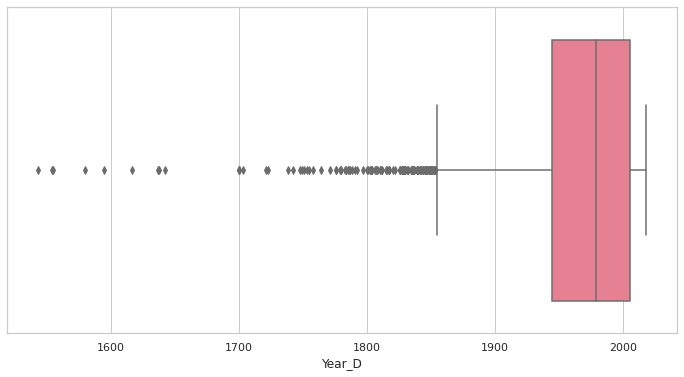

In [27]:
#mostrar outlayers para dejar fuera esos datos si fuera necesario
#attacks_Year.Year_D = attacks_Year.Year_D.astype(dtype="int64")
#sns.boxplot(x="Year_D", data = attacks_Year,palette ="husl");
anual.Year_D = anual.Year_D.astype(dtype = "int64")
sns.boxplot(x = "Year_D",data = anual,palette ="husl");

In [39]:
#el gráfico anterior muestra que el grueso de ataques empieza sobre 1950
#df2 = df[df["region"] == "Boston"]
anual = anual[anual.Year_D > 1950]
attacks_Year= anual.groupby('Year_D')['Activity'].count().reset_index()
attacks_Year.rename(columns={'Year_D':'Year','Activity':'Count'}, inplace = True)
attacks_Year.head(3)


,Year,Count
0,1951,30
1,1952,28
2,1953,35


In [41]:
fig = px.line(attacks_Year,x="Year", y ="Count")
fig.show()

## hipótesis 2 los ataquesde tiburones atacan más a embarcaciones que a nadadores

#### 

In [9]:
Tipo = anual.groupby("Boat")["Act"].count().reset_index()
Tipo

,Boat,Act
0,No,3898
1,Yes,239


In [10]:
fig = px.bar(Tipo, x="Boat", y= "Act",color = "Act")
fig.show()

### [hipóstesis 3 Florida es la capital mundial de los ataques de tiburones](https://www.lavanguardia.com/ocio/viajes/20210407/6631447/6-playas-mas-peligrosas-mundo.html)

In [11]:
areas = sharks[(sharks.Area != "UNKNOWN")]

In [12]:
#Tipo = anual.groupby("Boat")["Act"].count().reset_index()
Areas = areas.groupby("Area")["Country"].count().reset_index()

In [13]:
#elegimos lasl 20 areas con más ataques de tiburón para compararlas con Florida.
fig = px.bar(areas, x= areas.Area.value_counts().head(20).index, y = areas.Area.value_counts().head(20).values, color = areas.Area.value_counts().head(20).values)

In [14]:
fig.show()

In [15]:
#ataques en Florida por tipo de herida
florida = sharks[(sharks.Area == "Florida")&(sharks.Act != "UNKONWN")]

In [16]:
Tipo_Flor = florida.groupby('Act')['Boat'].count().reset_index()

In [17]:
fig = px.bar(Tipo_Flor, x = "Act", y = "Boat", color = "Boat")
fig.show()

### [hipótesis 4 ¿Es posible el ataque de tiburón en la costa española?](https://www.mundo-geo.es/naturaleza/es-posible-ataque-tiburon-en-costa-espanola_238643_102.html)

In [18]:
country = sharks[(sharks.Country != "UNKNOWN")]
Spain_comp = country.groupby("Country")["Area"].count().reset_index()
Spain_comp = Spain_comp[(Spain_comp.Area > 30)]
fig = px.bar(Spain_comp, x = "Country", y = "Area", color = "Area")
fig.show()

In [19]:
Spain = country[(country["Country"] == "SPAIN")]
Spain.Year_D = Spain.Year_D.astype(dtype = "int64")
Spain_Years = Spain.groupby("Year_D")["Area"].count().reset_index()

/home/sinatxe/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Year_D', ylabel='Count'>

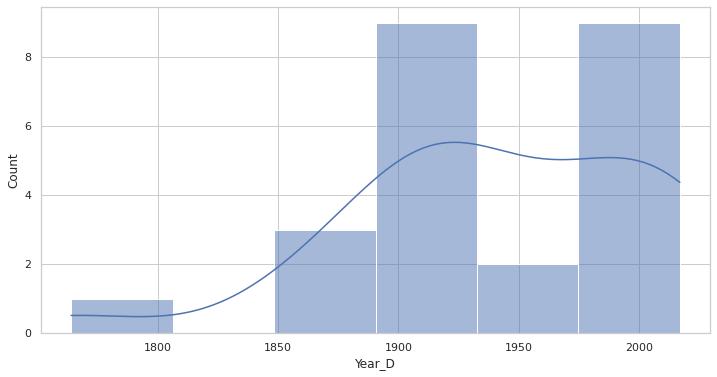

In [20]:
fig = sns.histplot(data = Spain_Years, x = "Year_D", palette = "husl", kde = True)
fig